# Wind Farms (Foreshore Process)

https://data.gov.ie/dataset/wind-farms-foreshore-process

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [13]:
# base data download directory
SUB_DIR = os.path.join("data", "wind-farms-foreshore-process")
os.makedirs(SUB_DIR, exist_ok=True)

URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "803a4ecc22aa4cc09111072a0bbc4fac_2/downloads/"
    "data?format=shp&spatialRefId=4326&where=1%3D1"
)
KNOWN_HASH = None
FILE_NAME = "wind-farms-foreshore-process.zip"

DATA_DIR_TEMP = os.path.join(SUB_DIR, "temp")

os.makedirs(DATA_DIR_TEMP, exist_ok=True)

DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)

# boundary data
ie = gpd.read_file(
    os.path.join("data", "boundaries", "ref-nuts-2021-01m.gpkg"),
    layer="NUTS_RG_01M_2021_4326_IE"
)

In [3]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: eb0f0c1b14a0db959b47795a623d0e8b74bfb32285656905ae30136a4e34446b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [5]:
ZipFile(DATA_FILE).namelist()

['Energy_Offshore_Renewable.shp',
 'Energy_Offshore_Renewable.shx',
 'Energy_Offshore_Renewable.dbf',
 'Energy_Offshore_Renewable.cpg',
 'Energy_Offshore_Renewable.prj',
 'Energy_Offshore_Renewable.xml']

In [10]:
wind_farms = gpd.read_file(os.path.join(f"zip://{DATA_FILE}!Energy_Offshore_Renewable.shp"))

In [17]:
wind_farms

,OBJECTID,Name,Type,MDM_Catego,NMPF_Chapt,NMPF_Cha_1,Map_Featur,Map_Data_S,Last_Updat,Policy01_N,...,Metadata_L,Policy01_P,Policy01_C,Policy02_P,Policy02_C,Policy03_P,Policy03_C,Shape__Are,Shape__Len,geometry
0,1,Arklow Bank Phase 2,Fixed-Bottom,Site Investigations,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,2.250444e+08,100497.903394,"POLYGON ((-5.93548 52.91692, -5.89438 52.91263..."
1,2,Kilmichael Point\r\nKilmichael Point,Fixed-Bottom,Site Investigations,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,1.161684e+09,189889.026085,"POLYGON ((-5.93365 52.77761, -5.82004 52.77455..."
2,3,Codling Wind Park Extension,Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,1.499075e+08,49493.937029,"POLYGON ((-5.82899 53.06846, -5.70872 53.06905..."
3,4,Codling Wind Park,Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,1.772440e+08,52305.059653,"POLYGON ((-5.82899 53.06846, -5.84163 53.08427..."
4,5,Dublin Array,Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,1.743404e+08,75380.647680,"POLYGON ((-5.94842 53.31128, -5.89585 53.31037..."
5,6,Oriel Wind Farm,Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,7.228915e+07,32827.248499,"POLYGON ((-6.09061 53.94581, -6.03729 53.94376..."
6,7,Clogher Head,Fixed-Bottom,Site Investigations,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,3.574228e+08,77437.215521,"POLYGON ((-6.11587 53.88353, -5.92654 53.82143..."
7,8,North Irish Sea Array (NISA),Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,1.063060e+09,172938.194916,"POLYGON ((-6.12787 53.79953, -6.12168 53.81454..."
8,9,Sceirde (Skerd) Rocks,Fixed-Bottom,Relevant Projects,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,8.202439e+07,35226.054124,"POLYGON ((-9.99404 53.28367, -9.96766 53.29433..."
9,10,Arklow Bank Phase I,Fixed-Bottom,Fully Commissioned,15,Energy â€“ Offshore Renewable,Wind Farms (Foreshore Process),Windfarm_Licences_Polygons_Jan2021,2020,ORE Policy 3,...,http://data.marine.ie/geonetwork/srv/eng/catal...,P,ORE3,P,ORE5,S,SAS1,9.524165e+06,14676.678000,"POLYGON ((-5.96683 52.77006, -5.95549 52.79934..."


In [12]:
wind_farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

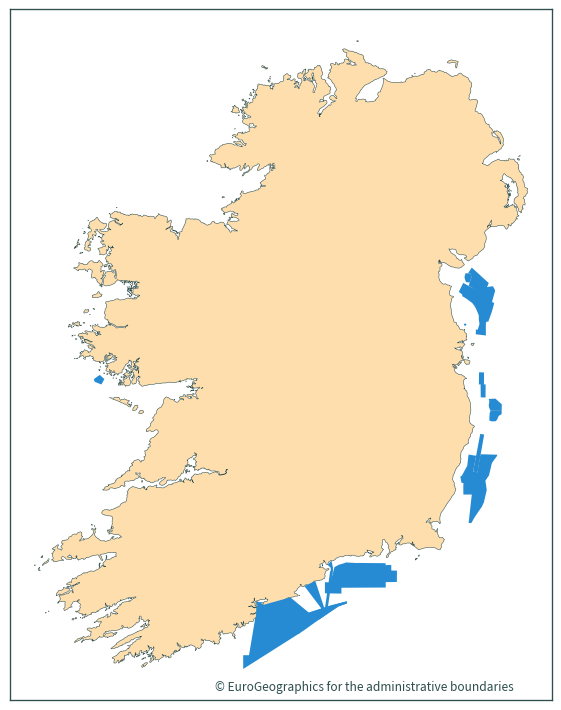

In [16]:
ax = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)
wind_farms.plot(ax=ax)

plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()